# **CAR PRICE PREDICATION**

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1.name
2.year
3.selling_price
4.km_driven
5.fuel
6.seller_type
7.transmission
8.Owner




In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

data = pd.read_csv('/kaggle/input/car-data/cardata.csv');

1.  Display the first 5  rows of data set

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


2. Display the last 5 rows of dataset

In [4]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


3. find the shape of our daraset ( number of rows and number of columns )

In [5]:
data.shape

(301, 9)

In [6]:
print("number of rows ",data.shape[0])
print("number of coloumns ",data.shape[1])

number of rows  301
number of coloumns  9


4.  get information about the dataset like total number of rows total number of column data type of each collumn and memory requirement 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


5. Check the null values in dataset

In [8]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

6. get overall statistic about the dataset

In [9]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


7. Data preprocessing

In [10]:
data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [11]:
import datetime

In [12]:
date_time = datetime.datetime.now()

In [13]:
data['Age'] = date_time.year - data['Year']

In [14]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [15]:
data.drop('Year' , axis = 1 , inplace = True)

In [16]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


 outlier remover

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

(301, 9)


<Axes: >

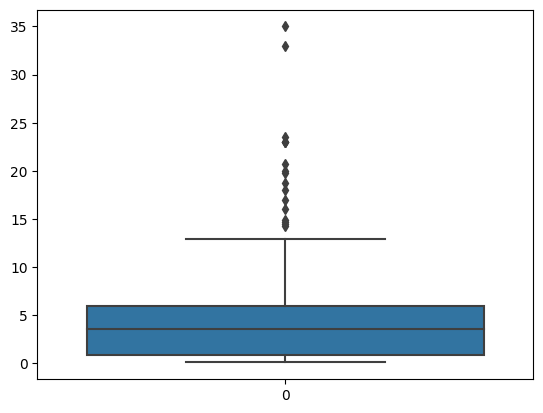

In [18]:
print(data.shape)
sns.boxplot(data['Selling_Price'])


In [19]:
sorted(data['Selling_Price'],reverse = True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [20]:
data= data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]

In [21]:
data.shape

(299, 9)

Encoding the categorical columns

In [22]:
data.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9


In [23]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [24]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [25]:
data['Fuel_Type'].unique()

array([0, 1, 2])

In [26]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [27]:
data['Seller_Type'] = data['Seller_Type'].map({'Dealer':0,'Individual':1})

In [28]:
data['Seller_Type'].unique()

array([0, 1])

In [29]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [30]:
data['Transmission'] = data['Transmission'].map({'Manual':0,'Automatic':1})

In [31]:
data['Transmission'].unique()

array([0, 1])

In [32]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9


8. store feature matrix in x and response(target) in vectore y 

In [33]:
x = data.drop(['Car_Name','Selling_Price'],axis = 1)
y = data["Selling_Price"]

In [34]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

9. splitting the dataset into traing or test dataset

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

10. import the models 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

11. model traing

In [38]:
lr = LinearRegression()
lr.fit(x_train,y_train)

rf =  RandomForestRegressor()
rf.fit(x_train,y_train)

xgb =  GradientBoostingRegressor()
xgb.fit(x_train,y_train)

xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

12. predication on  test data

In [39]:
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = xgb.predict(x_test)
y_pred4 = xg.predict(x_test)

13. Evaluating the algorithm

In [40]:
from sklearn import metrics

In [41]:
#Accuracy

score1 = metrics.r2_score(y_test,y_pred1)*100
score2 = metrics.r2_score(y_test,y_pred2)*100
score3 = metrics.r2_score(y_test,y_pred3)*100
score4 = metrics.r2_score(y_test,y_pred4)*100


In [42]:
print(score1,score2,score3,score4)

67.90884983129405 74.00022095984087 89.781436643737 88.64839405756888


In [43]:
final_data = pd.DataFrame({'Models': ['LR','RF','GBR','XG'],"R2_SCORE":[score1,score2,score3,score4]})

In [44]:
final_data

,Models,R2_SCORE
0,LR,67.908850
1,RF,74.000221
2,GBR,89.781437
3,XG,88.648394


<Axes: xlabel='Models', ylabel='R2_SCORE'>

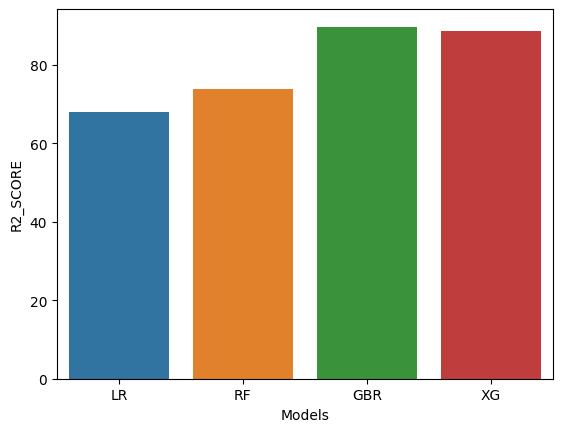

In [45]:
import seaborn as sns
sns.barplot(x=final_data['Models'],y=final_data['R2_SCORE'])

14. save the model

In [46]:
xg = XGBRegressor()
xg_final = xg.fit(x,y)

In [47]:
import joblib

In [48]:
joblib.dump(xg_final,'car_price_predictor')

['car_price_predictor']

In [49]:
model = joblib.load('car_price_predictor')

15. predicat on new data

In [50]:
import pandas as pd

data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Kms_Driven':27000,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])

In [51]:
model.predict(data_new)

array([3.7360353], dtype=float32)